<a href="https://colab.research.google.com/github/vishva2410/Stock-price-prediction/blob/main/stockpredictiontry2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from datetime import datetime
import os

In [3]:
df = pd.read_csv('all_stocks_5yr.csv')
df.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
df['date']=pd.to_datetime(df['date'])
df.head(2)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL


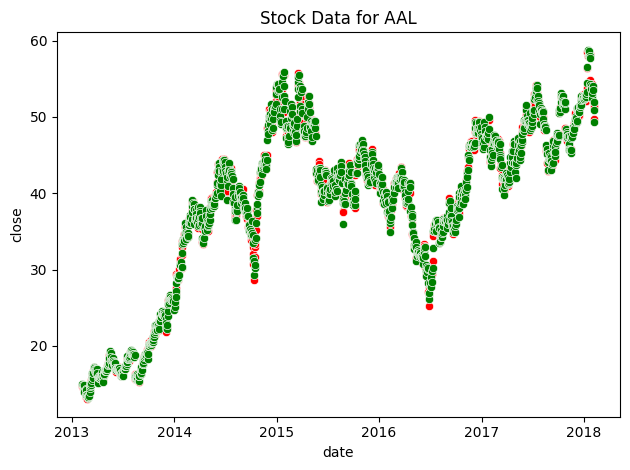

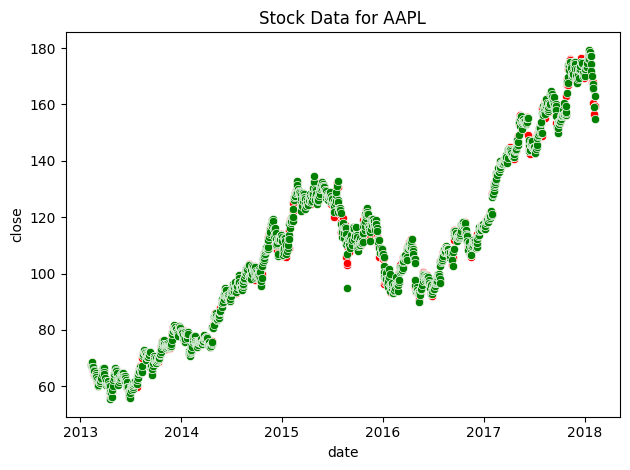

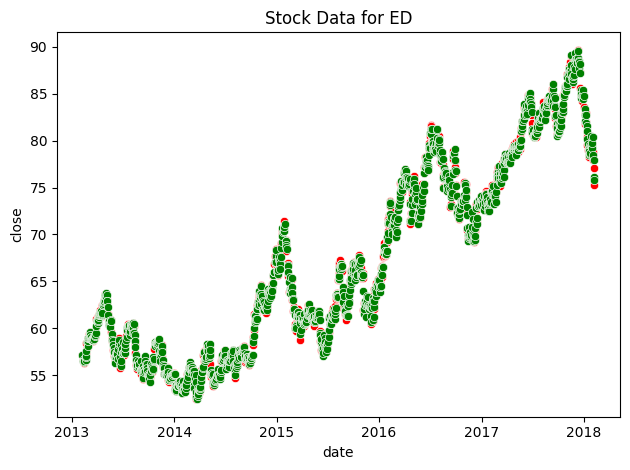

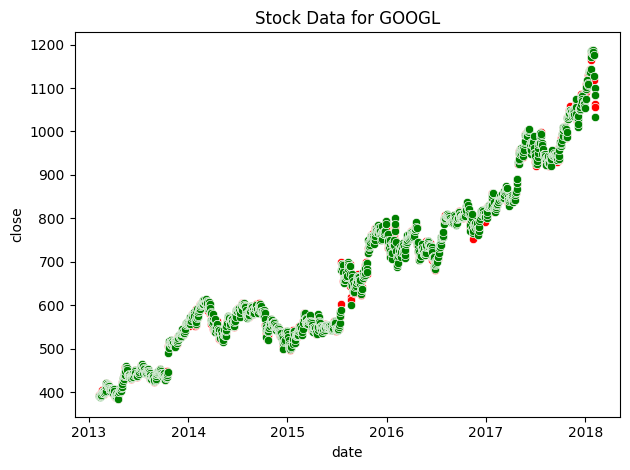

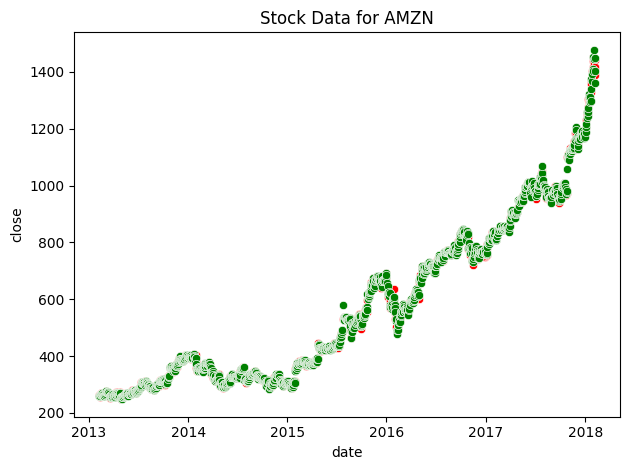

In [5]:
comp = ['AAL','AAPL','ED','GOOGL','AMZN']
for i in comp:
  filtered_df = df[df['Name'] == i]
  sns.scatterplot(x=filtered_df['date'],y=filtered_df['close'],c='r',markers='@')
  sns.scatterplot(x=filtered_df['date'],y=filtered_df['open'],c='g',markers='-')
  plt.title(f"Stock Data for {i}")
  plt.tight_layout()
  plt.show()

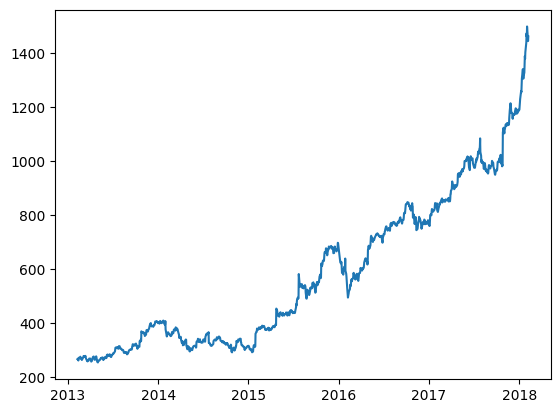

In [11]:
amazon = df[df['Name']=='AMZN']
df2 = amazon.loc[(amazon['date'] > datetime(2000,1,1))
                             & (amazon['date'] < datetime(2023,1,1))]
plt.plot(df2['date'],df2['high'])
plt.show()

In [7]:
x = df.drop(['close'],axis=1)
y = df['close']

In [8]:
le = LabelEncoder()
x['Name'] = le.fit_transform(x['Name'])


x['date'] = x['date'].astype(np.int64) // 10**9

se = StandardScaler()
x = se.fit_transform(x)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
timesteps = 1  # You might need to adjust this based on your data
x_train = x_train.reshape(x_train.shape[0], timesteps, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], timesteps, x_test.shape[1])

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64,activation='relu',input_shape=(x_train.shape[1],x_train.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',loss='mse')

In [14]:
model.fit(x_train,y_train,epochs=2,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/2
15476/15476 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - loss: nan - val_loss: nan
Epoch 2/2
15476/15476 ━━━━━━━━━━━━━━━━━━━━ 80s 5ms/step - loss: nan - val_loss: nan


In [15]:
y_pred = model.predict(x_test)

3869/3869 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
